# Exercise 1 Digit Classification: Dennis Shushack  


In [202]:
# Libraries Needed:
import numpy as np 
import skimage
import skimage.io
import skimage.data
import skimage.feature
import matplotlib.pyplot as plt
import ipywidgets as widgets
import tensorflow as tf
%matplotlib inline 
plt.rcParams["figure.figsize"] = (5,5)

(500, 500)


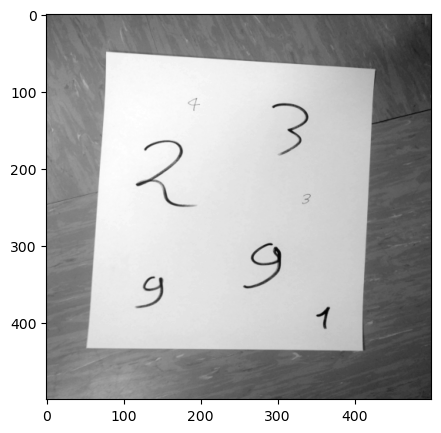

In [240]:
# Loads the image: 
im = skimage.io.imread("./Images_1/IMG_20190312_183852.jpg")
im = skimage.img_as_float(im)

# Converts the image to grayscale:
gray_im = skimage.color.rgb2gray(im)

resized_image = skimage.transform.resize(gray_im, (500, 500))
print(resized_image.shape)

plt.imshow(resized_image, cmap='gray')

(array([263, 222, 168, 132], dtype=uint64), array([ 0.06981317,  0.05235988, -1.50098316, -1.55334303]), array([  83.,  430.,  -42., -430.]))


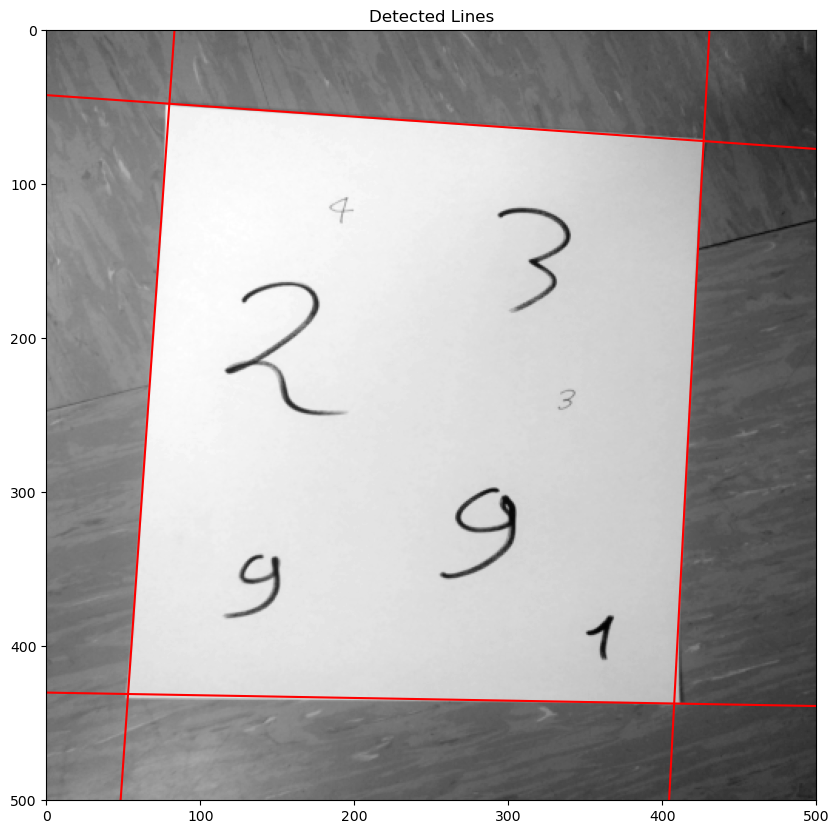

In [241]:
from skimage.transform import hough_line, hough_line_peaks

im_edges = skimage.feature.canny(resized_image,sigma=0)
h, theta, d = hough_line(im_edges)

# Extract the top peaks. Temporarily setting num_peaks to a higher value to inspect.
peaks = hough_line_peaks(h, theta, d, num_peaks=4)

peaks = skimage.transform.hough_line_peaks(h, theta, d, num_peaks=4)
print(peaks)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(resized_image, cmap=plt.cm.gray)
for angle, dist in zip(peaks[1], peaks[2]):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - resized_image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, resized_image.shape[1]), (y0, y1), '-r')
ax.set_xlim((0, resized_image.shape[1]))
ax.set_ylim((resized_image.shape[0], 0))
ax.set_title('Detected Lines')
plt.show()

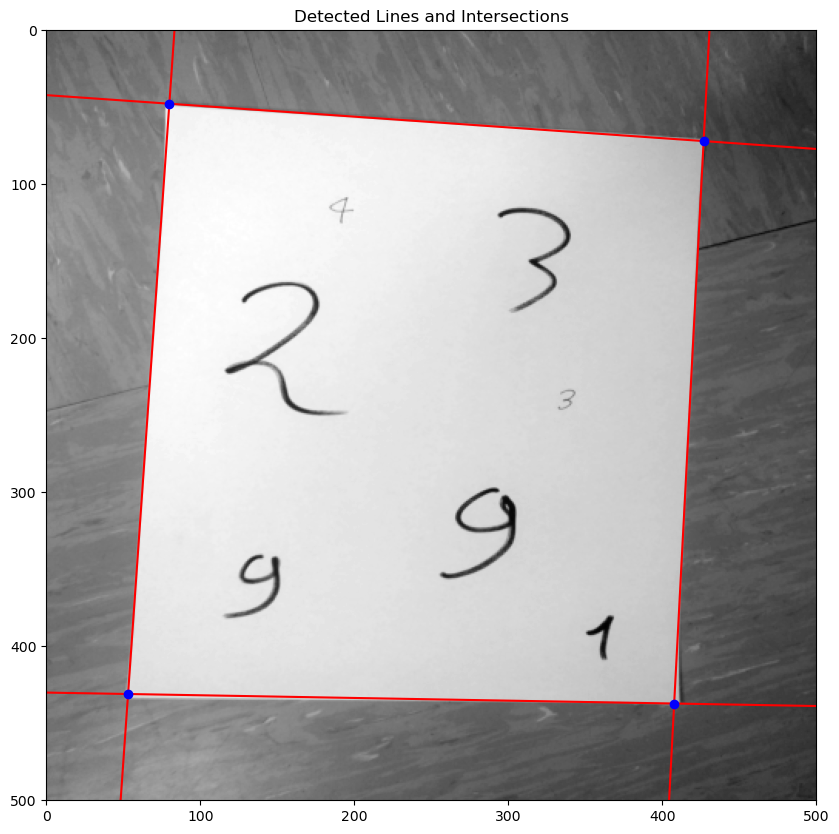

In [242]:
import numpy as np
import matplotlib.pyplot as plt

# Convert polar coordinates (theta, rho) to the line equation Ax + By + C = 0
def polar_to_homogeneous(theta, rho):
    A = np.cos(theta)
    B = np.sin(theta)
    C = -rho
    return np.array([A, B, C])

# Find intersection of two lines
def intersection(l1, l2):
    return np.cross(l1, l2)

# Extract lines from Hough peaks
lines = [polar_to_homogeneous(theta, dist) for theta, dist in zip(peaks[1], peaks[2])]

# Find intersections
intersections = []
for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        pt = intersection(lines[i], lines[j])
        if pt[2] != 0:  # Ensure it's not a point at infinity
            intersections.append((pt[0]/pt[2], pt[1]/pt[2]))

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(resized_image, cmap=plt.cm.gray)
for angle, dist in zip(peaks[1], peaks[2]):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - resized_image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, resized_image.shape[1]), (y0, y1), '-r')
for x, y in intersections:
    ax.plot(x, y, 'bo')  # Plot intersections as blue dots
ax.set_xlim((0, resized_image.shape[1]))
ax.set_ylim((resized_image.shape[0], 0))
ax.set_title('Detected Lines and Intersections')
plt.show()
